In [1]:
import sys
import os

# Add the parent directory 'experiments' to sys.path
sys.path.append(os.path.abspath('..'))

from models.PhysicsModel import OmniRobotDynamic
from models.HybridModel import HybridModel
from training.TrajectoryDataset import RobotTrajectoryDataset
from training.AutoRegressiveTrainer import AutoregressiveTrainer
import pandas as pd

df_dataset = pd.read_csv("../dataset/processed_data/data0.csv")
print(f"Loaded DataFrame with shape: {df_dataset.shape}")
    
# Create dataset
dataset = RobotTrajectoryDataset(
    df_dataset,
    input_steps=1,
    target_steps=500
)

print(f"Dataset size: {len(dataset)}")

Loaded DataFrame with shape: (9033, 11)
Dataset size: 8533


In [2]:
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
import torch

# Configuration
BATCH_SIZE = 32
LEARNING_RATE = 1e-2
EPOCHS = 5
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

train_dataset = RobotTrajectoryDataset(
    df_dataset,
    input_steps=1,
    target_steps=20
)

print(f"Dataset size: {len(dataset)}")

# Split dataset into train and validation
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Initialize Model
model = OmniRobotDynamic(mass=2.8, dt=0.016)

# Initialize Optimizer
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Initialize Trainer
trainer = AutoregressiveTrainer(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    device=DEVICE
)

print(f"Training on device: {DEVICE}")

Dataset size: 8533
Training on device: cpu


In [3]:
# Training Loop
loss_history = []
val_loss_history = []

for epoch in range(EPOCHS):
    train_loss = trainer.one_epoch()
    val_loss = trainer.validate()
    
    loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    
    print(f"Epoch {epoch+1}/{EPOCHS} - Train Loss: {train_loss:.6f} - Val Loss: {val_loss:.6f}")
    
    # Optional: Save best model
    if epoch % 10 == 0:
        model_save_path = f"../models/trained/checkpoint_epoch_{epoch}.pth"
        torch.save(model.state_dict(), model_save_path)

# Save final model
final_model_path = "../models/trained/omni_robot_dynamic_weights_new.pth"
torch.save(model.state_dict(), final_model_path)
print(f"Training Complete. Model saved to {final_model_path}")

Training: 100%|██████████| 214/214 [00:55<00:00,  3.88it/s, loss=5.68]


Epoch 1/5 - Train Loss: 6.018593 - Val Loss: 5.763087


Training: 100%|██████████| 214/214 [00:53<00:00,  3.99it/s, loss=3.87]


Epoch 2/5 - Train Loss: 5.434333 - Val Loss: 5.196692


Training: 100%|██████████| 214/214 [00:53<00:00,  4.02it/s, loss=4.59]


Epoch 3/5 - Train Loss: 5.052412 - Val Loss: 4.967452


Training: 100%|██████████| 214/214 [00:54<00:00,  3.95it/s, loss=5.07]


Epoch 4/5 - Train Loss: 4.811019 - Val Loss: 4.692779


Training: 100%|██████████| 214/214 [00:54<00:00,  3.90it/s, loss=4.63]


Epoch 5/5 - Train Loss: 4.623301 - Val Loss: 4.608543
Training Complete. Model saved to ../models/trained/omni_robot_dynamic_weights_new.pth


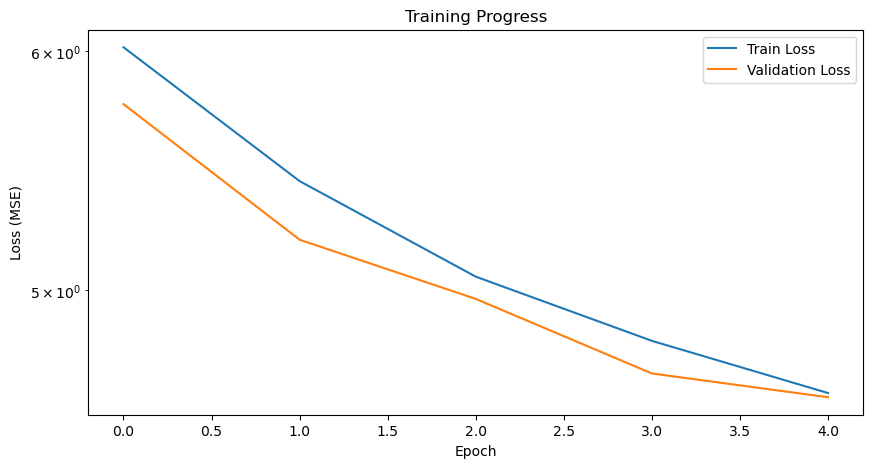

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training Progress')
plt.legend()
plt.yscale('log')
plt.show()

# Residual

In [5]:
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
import torch

# Configuration
BATCH_SIZE = 32
LEARNING_RATE = 1e-2
EPOCHS = 5
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

train_dataset = RobotTrajectoryDataset(
    df_dataset,
    input_steps=1,
    target_steps=20
)

print(f"Dataset size: {len(dataset)}")

# Split dataset into train and validation
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Initialize Model
model = HybridModel()

# Initialize Optimizer
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Initialize Trainer
trainer = AutoregressiveTrainer(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    device=DEVICE
)

print(f"Training on device: {DEVICE}")

# Training Loop
loss_history = []
val_loss_history = []

for epoch in range(EPOCHS):
    train_loss = trainer.one_epoch()
    val_loss = trainer.validate()
    
    loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    
    print(f"Epoch {epoch+1}/{EPOCHS} - Train Loss: {train_loss:.6f} - Val Loss: {val_loss:.6f}")
    
    # Optional: Save best model
    if epoch % 10 == 0:
        model_save_path = f"../models/trained/checkpoint_epoch_{epoch}.pth"
        torch.save(model.state_dict(), model_save_path)

# Save final model
final_model_path = "../models/trained/hybrid_model_new.pth"
torch.save(model.state_dict(), final_model_path)
print(f"Training Complete. Model saved to {final_model_path}")

Dataset size: 8533
Training on device: cpu


Training: 100%|██████████| 214/214 [01:35<00:00,  2.23it/s, loss=2.16]


Epoch 1/5 - Train Loss: 3.014604 - Val Loss: 2.327468


Training: 100%|██████████| 214/214 [01:31<00:00,  2.34it/s, loss=2.04]


Epoch 2/5 - Train Loss: 2.234670 - Val Loss: 2.172085


Training: 100%|██████████| 214/214 [01:33<00:00,  2.29it/s, loss=2.47]


Epoch 3/5 - Train Loss: 2.123257 - Val Loss: 2.121138


Training: 100%|██████████| 214/214 [01:33<00:00,  2.30it/s, loss=1.97]


Epoch 4/5 - Train Loss: 2.067236 - Val Loss: 2.123276


Training: 100%|██████████| 214/214 [01:38<00:00,  2.17it/s, loss=2.33]


Epoch 5/5 - Train Loss: 2.040925 - Val Loss: 2.058456
Training Complete. Model saved to ../models/trained/hybrid_model_new.pth
